In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('D:/DEPI/Amit/Amit/data_analysis/In-Sessions/data_sets/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)


In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [6]:
dtypes=df.dtypes
n_unique=df.nunique()
pd.DataFrame({"Dtype":dtypes,"num_unigue":n_unique}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,str,float64,int64,int64,float64,str,str
num_unigue,2,3,2,88,7,7,248,147,3


In [7]:
def chk_type(df):
   dtypes=df.dtypes
   n_unique=df.nunique()
   return pd.DataFrame({"Dtype":dtypes,"num_unigue":n_unique}).T

chk_type(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,str,float64,int64,int64,float64,str,str
num_unigue,2,3,2,88,7,7,248,147,3


In [8]:
from chk_t import chk_type
chk_type(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,int64,int64,str,float64,int64,int64,float64,str,str
num_unigue,2,3,2,88,7,7,248,147,3


In [9]:
cols = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']
df[cols] =df[cols].astype('category')


In [10]:
from chk_t import chk_type
chk_type(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtype,category,category,category,float64,category,category,float64,str,category
num_unigue,2,3,2,88,7,7,248,147,3


In [11]:
def handle_types(cols):
   df[cols] = df[cols].astype('category')
   chk_type(df)

In [12]:

null = df.isnull().sum()
ratio = null / df.shape[0]
pd.DataFrame({"Null":null,"Ratio":ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null,0.0,0.0,0.0,177.000000,0.0,0.0,0.0,687.000000,2.000000
Ratio,0.0,0.0,0.0,0.198653,0.0,0.0,0.0,0.771044,0.002245


In [13]:
df = df.dropna(subset=['Embarked'])

In [14]:
df = df.drop('Cabin',axis=1)

In [15]:
median = df['Age'].median()
df['Age']=df['Age'].fillna(median)

In [16]:
null = df.isnull().sum()
ratio = null / df.shape[0]
pd.DataFrame({"Null":null,"Ratio":ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
!pip install matplotlib seaborn



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
num_col=['Age','Fare']


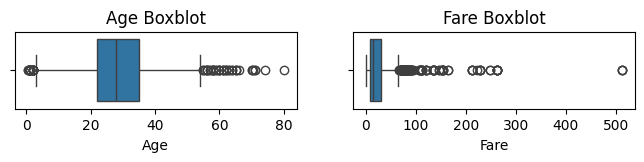

In [21]:
num_cols=df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i,col in enumerate(num_cols):
   plt.subplot(1,2,i+1)
   sns.boxplot(x=df[col],orient="h")
   plt.title(f"{col} Boxblot")

In [22]:
# def outliers_change(num_cols):
for col in num_cols:
      Q1= df[col].quantile(0.25)
      #print(Q1)
      Q3=df[col].quantile(0.75)
      # print(Q3)
      IQR=Q3-Q1
      # print(IQR)
      Lower_Fence=Q1-1.5*IQR
      Upper_Fance=Q3+1.5*IQR
      # print(Lower_Fence)
      # print(Upper_Fance)
      Lower_Outliers = df[df[col]<Lower_Fence][col].values
      # print(Lower_Outliers)
      Upper_Outliers = df[df[col]>Upper_Fance][col].values
      # print(Upper_Outliers)
      
      df[col].replace(Lower_Outliers,Lower_Fence,inplace=True)
      df[col].replace(Upper_Outliers,Upper_Fance,inplace=True)
# outliers_change(num_cols)

C:\Users\hp\AppData\Local\Temp\ipykernel_6572\2806790628.py:18: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df[col].replace(Lower_Outliers,Lower_Fence,inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_6572\2806790628.py:19: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignme

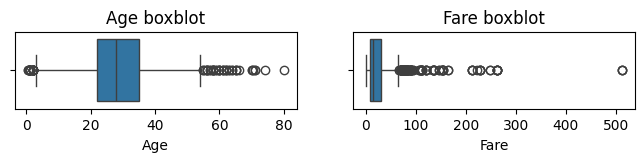

In [23]:
num_col=df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i,col in enumerate(num_col):
   plt.subplot(1,2,i+1)
   sns.boxplot(x=df[col])
   plt.title(f"{col} boxblot")
   # plt.show()

In [51]:
df.duplicated().sum()

np.int64(116)

In [53]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()


np.int64(0)

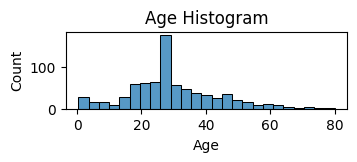

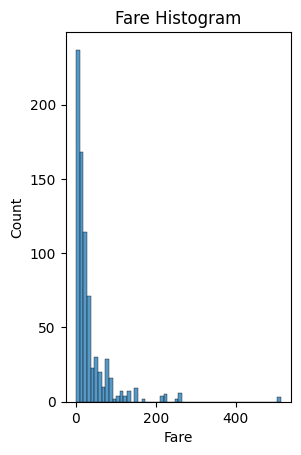

In [69]:
num_col=df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i,col in enumerate(num_col):
   plt.subplot(1,2,i+1)
   sns.histplot(x=df[col])
   plt.title(f"{col} Histogram")
   plt.show()

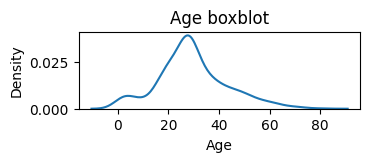

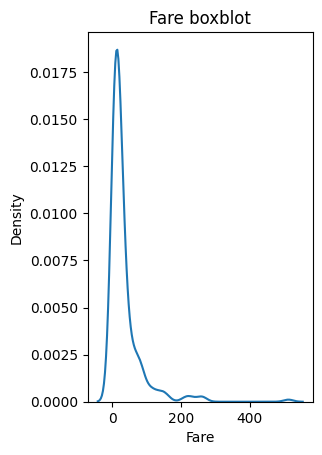

In [70]:
num_col=df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i,col in enumerate(num_col):
   plt.subplot(1,2,i+1)
   sns.kdeplot(x=df[col])
   plt.title(f"{col} boxblot")
   plt.show()

In [ ]:
num_col=df.select_dtypes('number').columns
plt.figure(figsize=(8,1))
for i,col in enumerate(num_col):
   plt.subplot(1,2,i+1)
   sns.(x=df[col])
   plt.title(f"{col} boxblot")
   plt.show()